# PRODIGY_DS_02

Problem Statement: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [105]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
# Shape of the data
df.shape

(891, 12)

In [107]:
# Columns of the dataset
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
# Dropping the 'Cabin' column, as it has many null values

df.drop(columns=['Cabin'], axis=1, inplace=True)

In [111]:
# Filling missing values of Age column with its mean value

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [112]:
# Filling missing values of Embarked column with its mode value

print(df['Embarked'].value_counts())   # 'S' is mode

df['Embarked'].fillna('S', inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [113]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [114]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [115]:
# Changing data types of some columns

df['Survived'] = df['Survived'].astype("category")
df['Pclass'] = df['Pclass'].astype("category")
df['Sex'] = df['Sex'].astype("category")
df['Age'] = df['Age'].astype("int")
df['Embarked'] = df['Embarked'].astype("category")

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [117]:
# Statistics of numerical columns
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Death percentage is: 61.62


C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


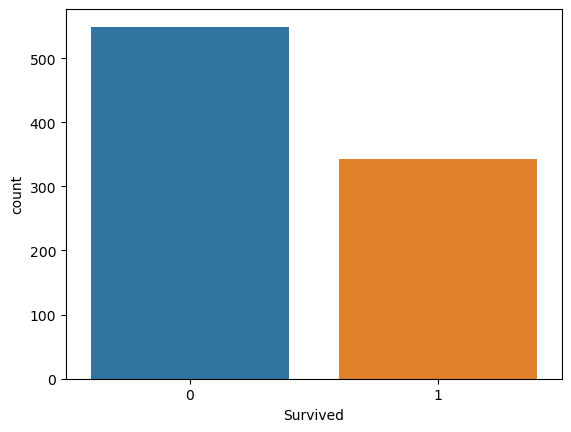

In [118]:
# Univariate analysis

# 1. Survived column
sns.countplot(df['Survived'])
print(f"Death percentage is: {df['Survived'].value_counts()[0] * 100 / 891 :.2f}")
plt.show()

Passenger class percetage: 
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


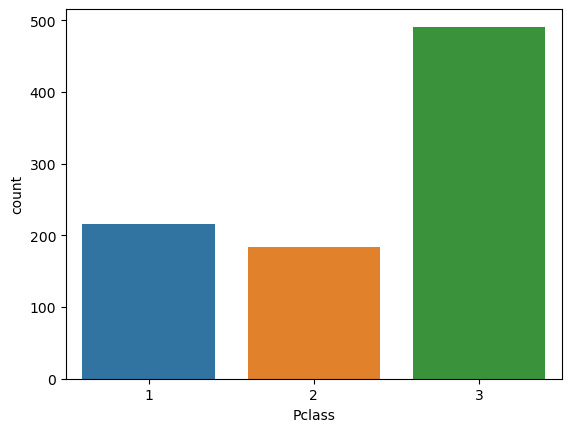

In [119]:
# 2. Pclass column

print(f"Passenger class percetage: \n{df['Pclass'].value_counts() * 100 / 891}")
sns.countplot(df['Pclass'])
plt.show()

male      64.758698
female    35.241302
Name: Sex, dtype: float64


C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


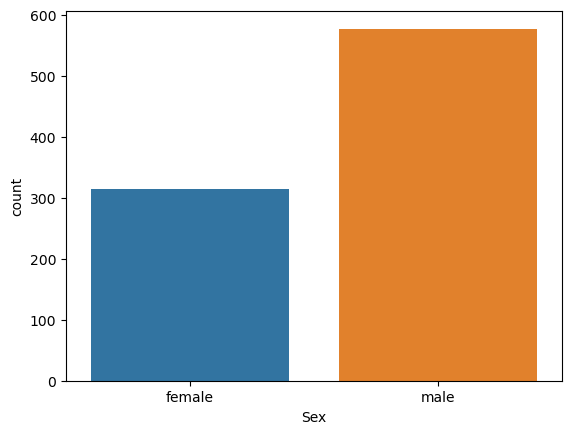

In [120]:
print(df['Sex'].value_counts() * 100 / 891)
sns.countplot(df['Sex'])
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


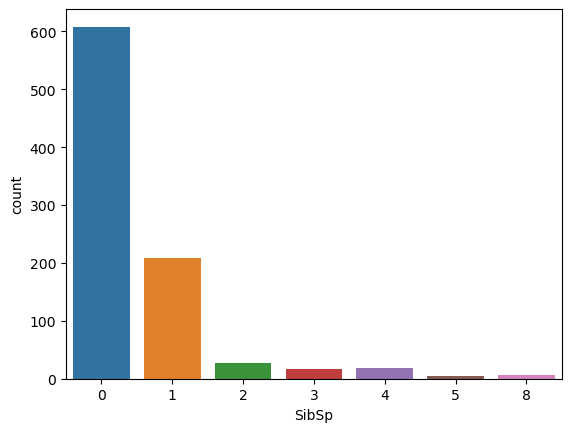

In [121]:
print(df['SibSp'].value_counts())
sns.countplot(df['SibSp'])
plt.show()

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


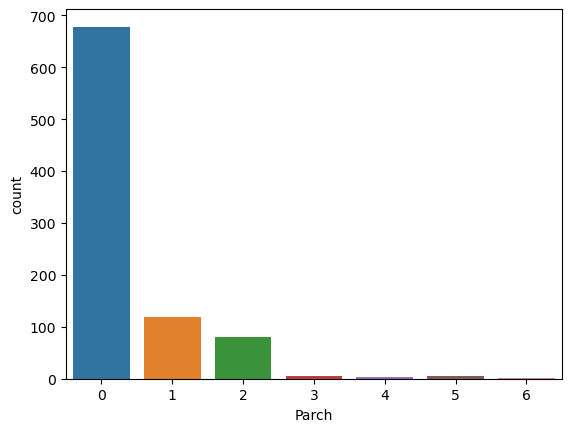

In [122]:
print(df['Parch'].value_counts())
sns.countplot(df['Parch'])
plt.show()

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Embarked percentage: 
S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


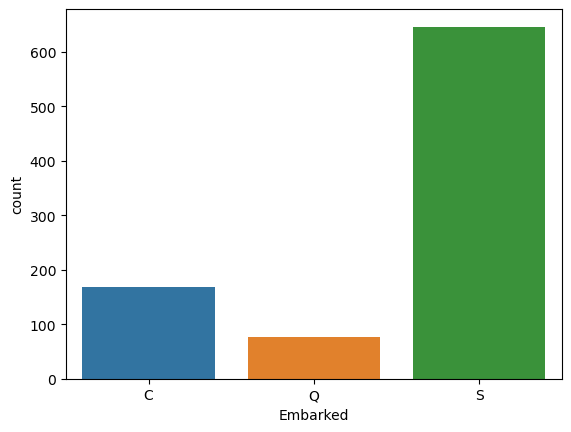

In [123]:
print(f"Embarked percentage: \n{df['Embarked'].value_counts() * 100 / 891}")
sns.countplot(df['Embarked'])
plt.show()

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Age skewness: 0.45956263424701577
Age kurtosis: 0.9865867453652877


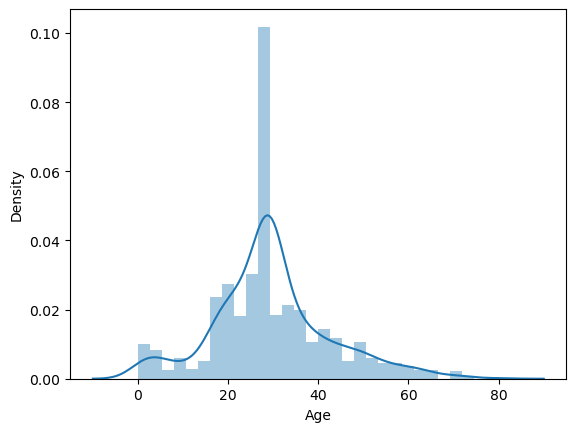

In [124]:
sns.distplot(df['Age'])
print("Age skewness:", df['Age'].skew())
print("Age kurtosis:", df['Age'].kurt())
plt.show()

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


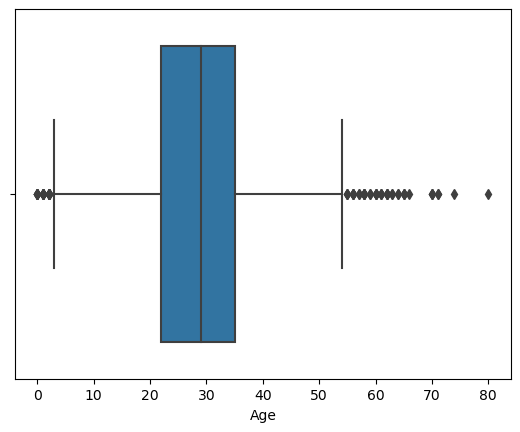

In [125]:
sns.boxplot(df['Age'])
plt.show()

In [126]:
print("People with age in between 60 & 70:", df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age in between 70 & 75:", df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75:", df[df['Age']>75].shape[0])
print("People with age between 0 & 1:", df[df['Age']<1].shape[0])

People with age in between 60 & 70: 15
People with age in between 70 & 75: 6
People with age greater than 75: 1
People with age between 0 & 1: 7


C:\Users\aryap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Fare skewness: 4.787316519674893
Fare kurtosis: 33.39814088089868


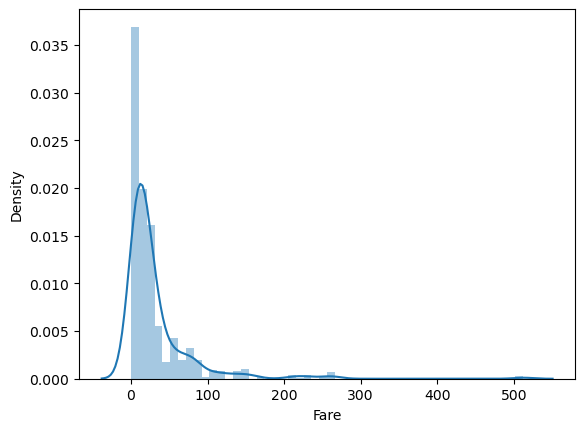

In [127]:
# Distribution of Fare column

print("Fare skewness:", df['Fare'].skew())
print("Fare kurtosis:", df['Fare'].kurt())
sns.distplot(df['Fare'])
plt.show()

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


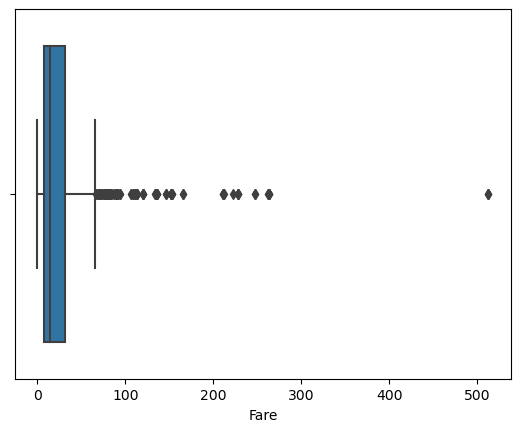

In [128]:
sns.boxplot(df['Fare'])
plt.show()

In [129]:
print("People with fare between $200 & $300:", df[(df['Fare']>=200) & (df['Fare']<=300)].shape[0])
print("People with fare greater than $300:", df[df['Fare']>300].shape[0])

People with fare between $200 & $300: 17
People with fare greater than $300: 3


CONCLUSION:
Fare column has highly skewed data, a lot of people had cheaper tickets. Outliers are there in the field.

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


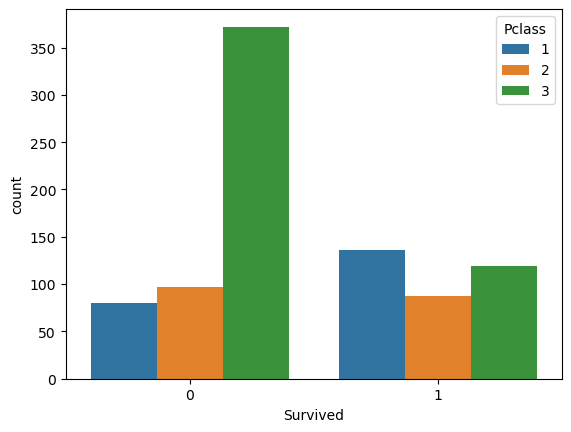

In [130]:
# MULTIVARIATE ANALYSIS

# 1. Survived & Pclass

sns.countplot(df['Survived'], hue=df['Pclass'])
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


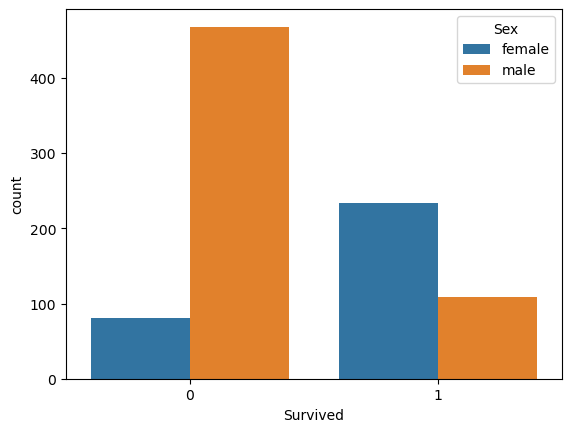

In [131]:
# 2. Survival & Gender

sns.countplot(df['Survived'], hue=df['Sex'])
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


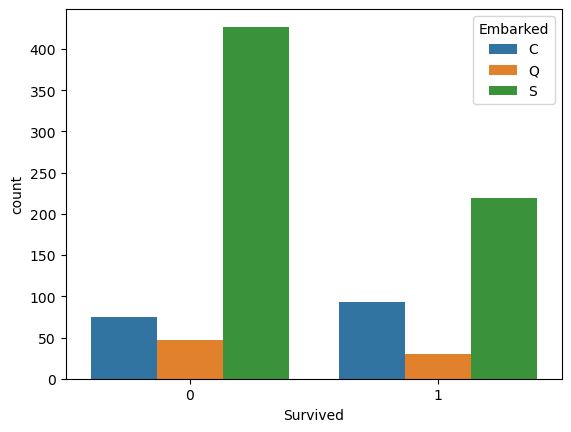

In [132]:
# 3. Survival & Embarked

sns.countplot(df['Survived'], hue=df['Embarked'])
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aryap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


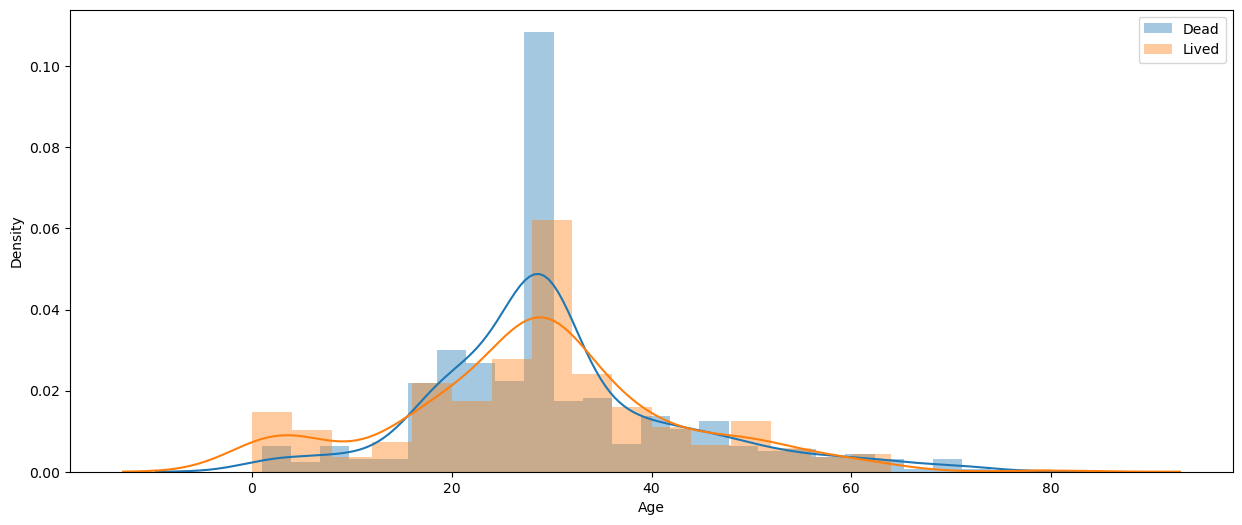

In [133]:
# Survival & Age

plt.figure(figsize=(15, 6))
sns.distplot(df[df['Survived'] == 0]['Age'], label="Dead")
sns.distplot(df[df['Survived'] == 1]['Age'], label="Lived")
plt.legend()
plt.show()

C:\Users\aryap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aryap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


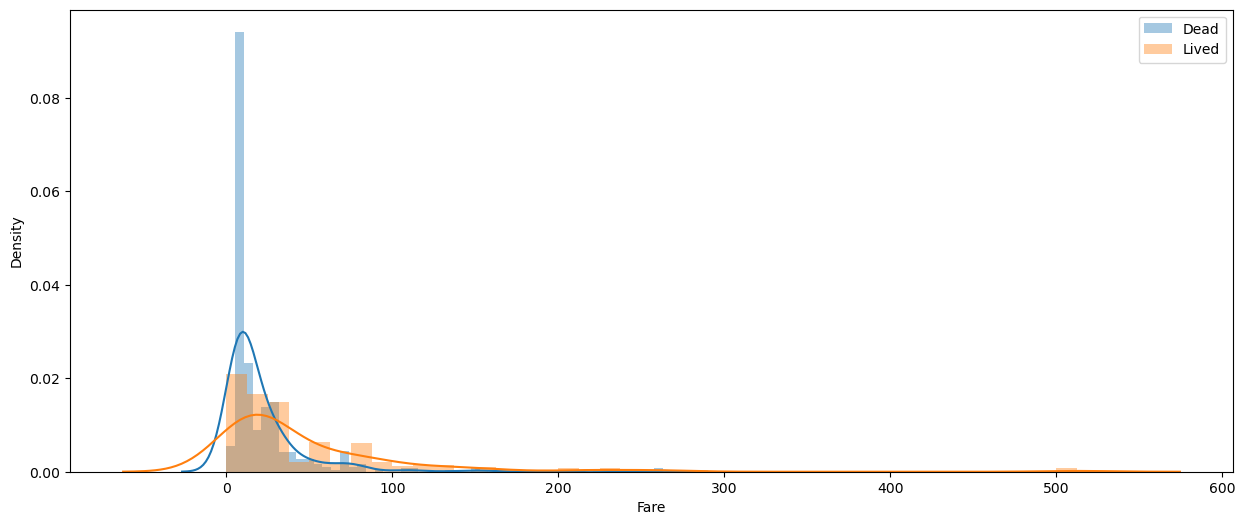

In [134]:
# Survival & Fare

plt.figure(figsize=(15, 6))
sns.distplot(df[df['Survived'] == 0]['Fare'], label="Dead")
sns.distplot(df[df['Survived'] == 1]['Fare'], label="Lived")
plt.legend()
plt.show()

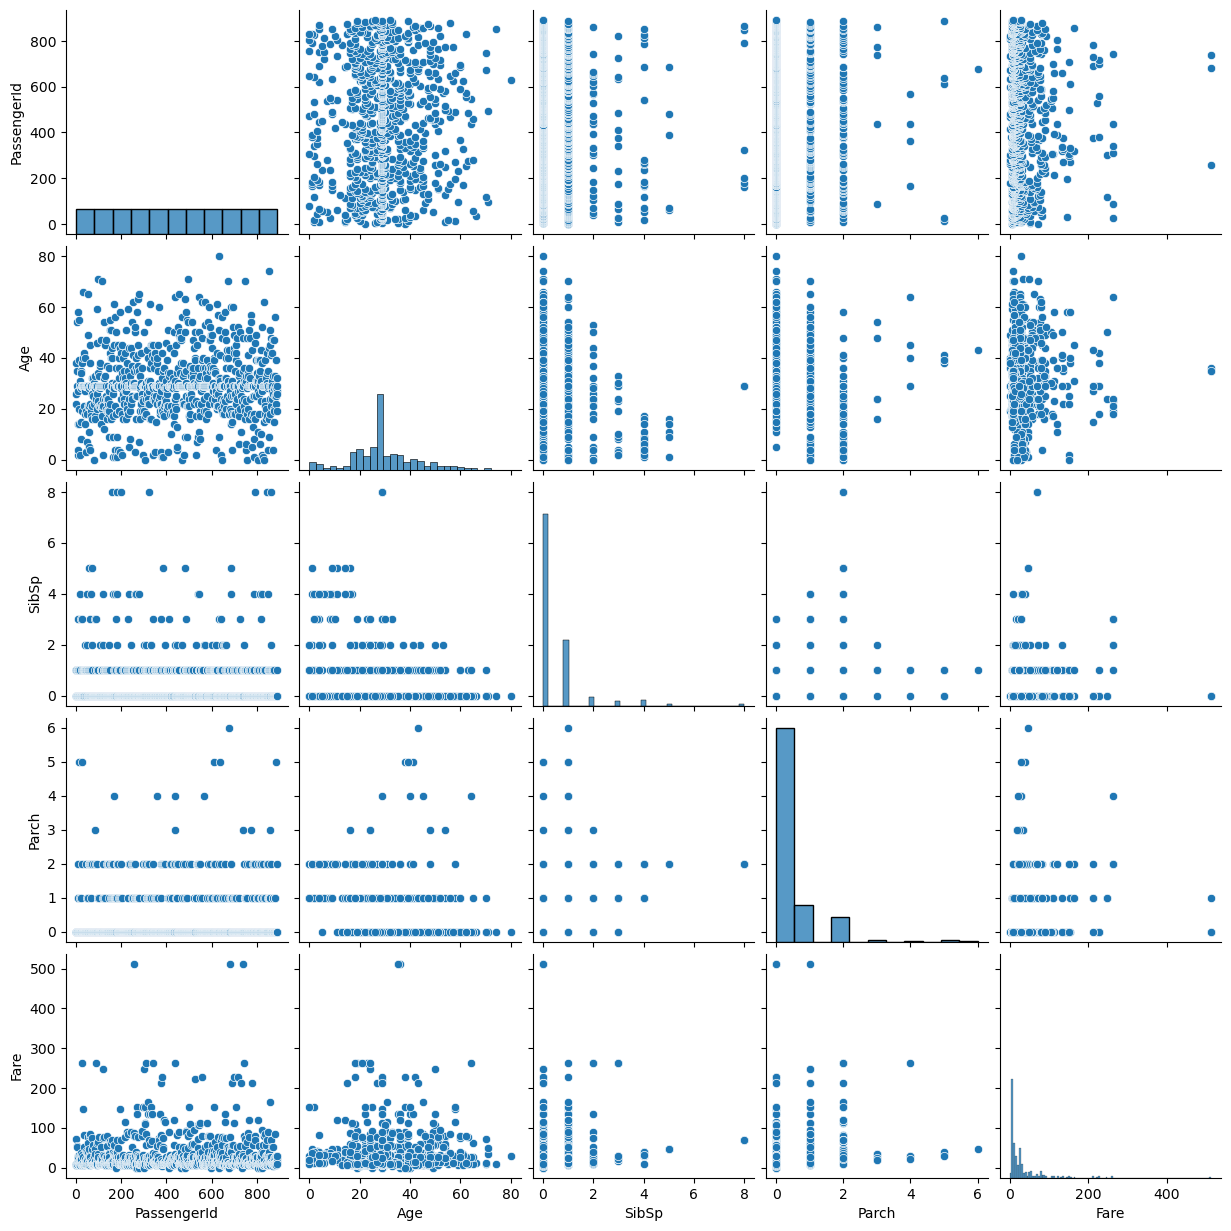

In [135]:
sns.pairplot(df)

<AxesSubplot:>

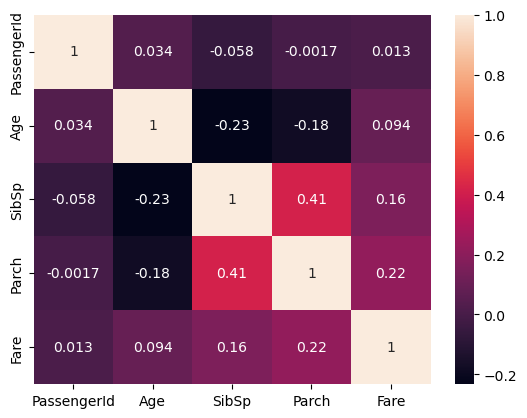

In [136]:
sns.heatmap(df.corr(), annot=True)

In [137]:
# FEATURE ENGINEERING

df['family_size'] = df['SibSp'] + df['Parch']

In [138]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34,1,1,347080,14.4000,S,2
236,237,0,2,"Hold, Mr. Stephen",male,44,1,0,26707,26.0000,S,1
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,29,0,0,343095,8.0500,S,0
421,422,0,3,"Charters, Mr. David",male,21,0,0,A/5. 13032,7.7333,Q,0
508,509,0,3,"Olsen, Mr. Henry Margido",male,28,0,0,C 4001,22.5250,S,0


In [139]:
def family_type(number):
    if number == 0:
        return "Alone"
    elif number > 0 and number <= 4:
        return "Medium"
    else:
        return "Large"

In [140]:
df['family_type'] = df['family_size'].apply(family_type)

In [141]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16,0,0,SOTON/OQ 392089,8.0500,S,0,Alone
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19,0,0,348124,7.6500,S,0,Alone
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33,3,0,3101278,15.8500,S,3,Medium
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17,0,2,17421,110.8833,C,2,Medium
696,697,0,3,"Kelly, Mr. James",male,44,0,0,363592,8.0500,S,0,Alone


In [142]:
# Dropping SibSp, Parch & family_size columns, as we have family_type

df.drop(columns=['SibSp', 'Parch', 'family_size'], axis=1, inplace=True)

In [143]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22,C 7077,7.2500,S,Alone
364,365,0,3,"O'Brien, Mr. Thomas",male,29,370365,15.5000,Q,Medium
332,333,0,1,"Graham, Mr. George Edward",male,38,PC 17582,153.4625,S,Medium
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24,250649,14.5000,S,Medium
821,822,1,3,"Lulic, Mr. Nikola",male,27,315098,8.6625,S,Alone


In [145]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


## DETECTING OUTLIERS

In [146]:
# Handling outliers in Age (almost normal)

df = df[df['Age'] < (df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [147]:
# Handling outliers in Fare column

# finding quartiles
q1 = np.percentile(df['Fare'], 25)
q3 = np.percentile(df['Fare'], 75)

outlier_low = q1 - 1.5 * (q3 - q1)
outlier_high = q3 + 1.5 * (q3 - q1)

df = df[(df['Fare'] > outlier_low) & (df['Fare'] < outlier_high)]

In [149]:
# One hot encoding

pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


In [150]:
df = pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'family_type'], drop_first=True)

<AxesSubplot:>

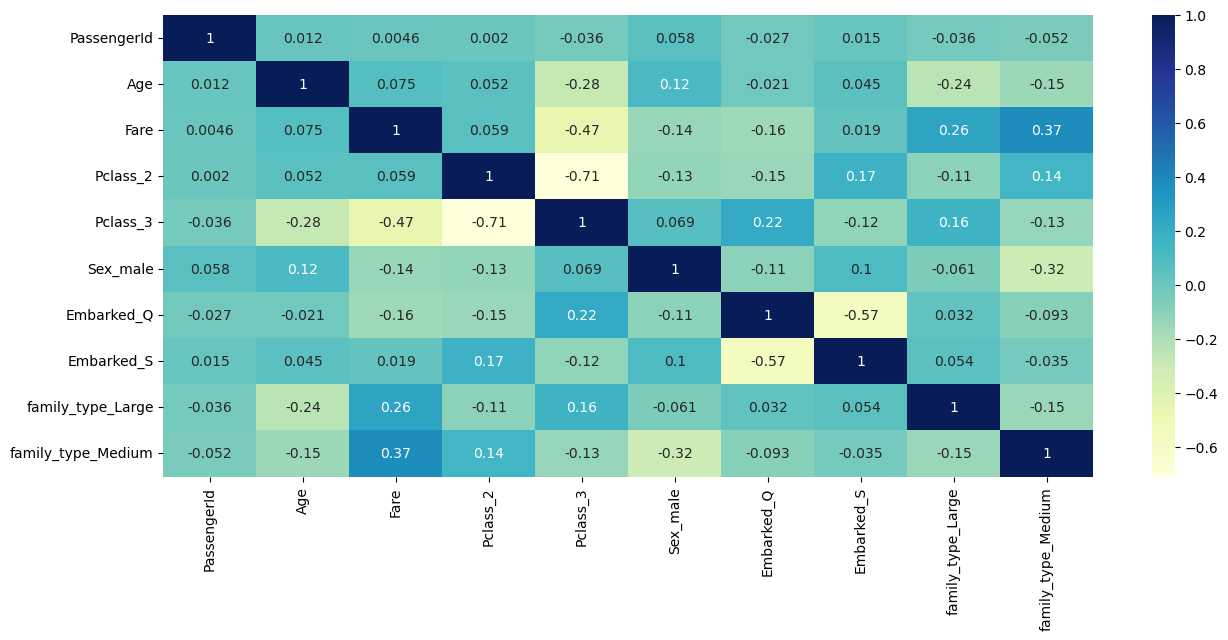

In [155]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

## CONCLUSION

- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people goinf to C survived more
- People in age range of 20 to 40 had a higher chance of not surviving
- People travelling with samller families had a higher chance of surviving the accident in comparison to people with large families and travelling alone